In [1]:
from config_figures import *

In [2]:
df = pd.read_csv(google_drive_path + '/' + sdms_area_lat_elev_asset + '.csv').drop(['system:index', '.geo'], axis=1)
df

,area,climate,median_elev,median_lat,min_tree_cover,species
0,9.416606e+11,1981_2010,271.175664,3.628973,0,Abarema_barbouriana
1,8.040583e+11,1981_2010,583.798649,-20.127242,0,Abarema_brachystachya
2,5.791520e+11,1981_2010,46.901477,-2.438856,0,Abarema_cochleata
3,3.037458e+11,1981_2010,251.950137,-12.438020,0,Abarema_filamentosa
4,3.035330e+12,1981_2010,199.640084,2.124966,0,Abarema_jupunba
...,...,...,...,...,...,...
42355,3.847464e+12,1981_2010,179.695740,-0.371729,20,Zygia_latifolia
42356,1.156334e+12,1981_2010,263.569186,5.127434,20,Zygia_longifolia
42357,1.920469e+12,1981_2010,135.565639,0.374240,20,Zygia_racemosa
42358,2.422293e+12,1981_2010,112.160143,-1.373868,20,Zygia_unifoliolata


# Figure 2b: SDM range size vs. median latitude

In [3]:
df_area_lat = df[(df['min_tree_cover'] == 10) & (df['climate'] == '1981_2010') & (df['median_lat'] != -999)][['species', 'area', 'median_lat']]
df_area_lat['area'] = df_area_lat['area'] / 1e12
df_area_lat

,species,area,median_lat
21180,Abarema_barbouriana,0.919650,3.628381
21181,Abarema_brachystachya,0.583012,-20.126729
21182,Abarema_cochleata,0.511100,-2.438659
21183,Abarema_filamentosa,0.212112,-12.685654
21184,Abarema_jupunba,2.873850,2.124942
...,...,...,...
31765,Zygia_latifolia,4.073369,-0.629770
31766,Zygia_longifolia,1.218121,5.378197
31767,Zygia_racemosa,1.946435,0.374169
31768,Zygia_unifoliolata,2.536577,-1.126276


In [4]:
values = np.vstack([df_area_lat["area"], df_area_lat["median_lat"]])
kernel = gaussian_kde(values)(values)
kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
kernel_norm

array([0.53515354, 0.4530836 , 0.50570799, ..., 0.37618441, 0.27224382,
       0.6067757 ])

In [5]:
latitudes = np.arange(-55, 65, 1)
mean_area = [df_area_lat[(df['median_lat'] >= lat-2) & (df['median_lat'] < lat+2)]['area'].mean() for lat in latitudes]

/var/folders/r2/w0bwjv2s0wb_c3q5wpnhbv2h0000gp/T/ipykernel_19212/1276557828.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_area = [df_area_lat[(df['median_lat'] >= lat-2) & (df['median_lat'] < lat+2)]['area'].mean() for lat in latitudes]


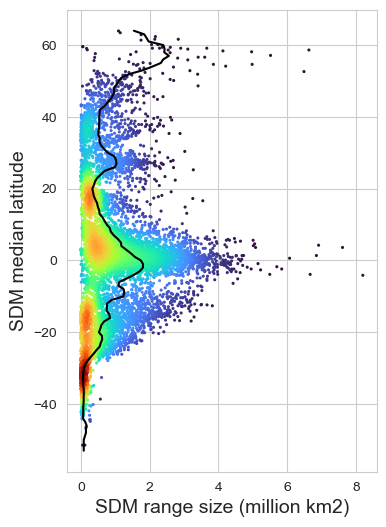

In [7]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(4,6))
sns.scatterplot(ax=ax, data = df_area_lat, x = 'area', y = 'median_lat', hue = kernel_norm, palette = 'turbo', s = 5, edgecolor = 'none', legend=False)
sns.lineplot(ax=ax, x = mean_area, y = latitudes, orient='y', c='k')
ax.set_xlabel('SDM range size (million km2)', fontsize=14)
ax.set_ylabel('SDM median latitude', fontsize = 14)
plt.show()

In [ ]:
sns.set_theme()

g = sns.jointplot(data = df_area_lat, x = 'area', y = 'median_lat', s = 5, edgecolor = 'none')# kind='hist')
g.ax_marg_y.remove()

In [350]:
rainbow = sns.color_palette("rainbow", as_cmap=True)

AttributeError: 'JointGrid' object has no attribute 'set_xlabel'

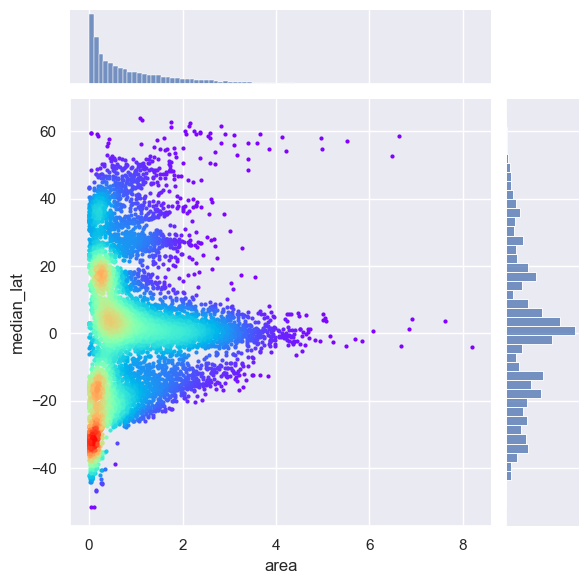

In [356]:
g = sns.jointplot(data = df_area_lat, x = 'area', y = 'median_lat', s=0.1)#, kind='kde')
# g.ax_marg_y.remove()
for x, y, c in zip(df_area_lat['area'].tolist(), df_area_lat['median_lat'].tolist(), kernel_norm):
    g.ax_joint.plot(x, y, color=rainbow(c), marker='o', markersize = 2, markeredgecolor = None)


# Figure 2c: SDM range size and range restriction per biome

In [3]:
biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}

In [4]:
biome_df = pd.read_csv(google_drive_path + '/' + sdm_biome_drive_filename + '.csv').drop(['system:index', '.geo'], axis=1)
biome_df = pd.melt(biome_df, id_vars=['species'], var_name = 'biome', value_name = 'sdm_frac')
biome_df = biome_df[(biome_df['sdm_frac'] > 20) & (biome_df['biome'].str.contains('Forests'))]
biome_df['biome_name'] = biome_df['biome'].apply(lambda b: biome_names[b])
biome_df

,species,biome,sdm_frac,biome_name
10,Abies_balsamea,Boreal Forests/Taiga,33,Boreal Forests
33,Abies_sibirica,Boreal Forests/Taiga,54,Boreal Forests
639,Alnus_incana,Boreal Forests/Taiga,25,Boreal Forests
693,Amelanchier_bartramiana,Boreal Forests/Taiga,49,Boreal Forests
1281,Betula_cordifolia,Boreal Forests/Taiga,39,Boreal Forests
...,...,...,...,...
148255,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,78,Tropical Moist Broadleaf Forests
148256,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,82,Tropical Moist Broadleaf Forests
148257,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,96,Tropical Moist Broadleaf Forests
148258,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,79,Tropical Moist Broadleaf Forests


In [5]:
df_pivot = df[df['climate'] == '1981_2010'].pivot(index='species', columns='min_tree_cover', values='area').reset_index()
df_pivot[10] = 100 - (df_pivot[10] / df_pivot[0] * 100)
df_pivot[20] = 100 - (df_pivot[20] / df_pivot[0] * 100)
df_pivot[0] = np.nan
df_range_restriction = df_pivot.melt(id_vars='species', value_vars=[0,10,20], value_name='range_restriction')
df_range_restriction

,species,min_tree_cover,range_restriction
0,Abarema_barbouriana,0,NaN
1,Abarema_brachystachya,0,NaN
2,Abarema_cochleata,0,NaN
3,Abarema_filamentosa,0,NaN
4,Abarema_jupunba,0,NaN
...,...,...,...
31765,Zygia_latifolia,20,15.188499
31766,Zygia_longifolia,20,11.801740
31767,Zygia_racemosa,20,3.884902
31768,Zygia_unifoliolata,20,14.660115


In [6]:
df_range_size_restriction = df[df['climate'] == '1981_2010'][['species', 'min_tree_cover', 'area']].merge(df_range_restriction).merge(biome_df[['species', 'biome_name']], how='outer')
df_range_size_restriction['area'] = df_range_size_restriction['area'] / 1e12
df_range_size_restriction

,species,min_tree_cover,area,range_restriction,biome_name
0,Abarema_barbouriana,0,0.941661,NaN,Tropical Moist Broadleaf Forests
1,Abarema_barbouriana,10,0.919650,2.337460,Tropical Moist Broadleaf Forests
2,Abarema_barbouriana,20,0.904127,3.985863,Tropical Moist Broadleaf Forests
3,Abarema_brachystachya,0,0.804058,NaN,Tropical Moist Broadleaf Forests
4,Abarema_brachystachya,10,0.583012,27.491394,Tropical Moist Broadleaf Forests
...,...,...,...,...,...
36835,Zygia_unifoliolata,10,2.536577,10.633767,Tropical Moist Broadleaf Forests
36836,Zygia_unifoliolata,20,2.422293,14.660115,Tropical Moist Broadleaf Forests
36837,Zygogynum_pancheri,0,0.010756,NaN,Tropical Moist Broadleaf Forests
36838,Zygogynum_pancheri,10,0.010529,2.110478,Tropical Moist Broadleaf Forests


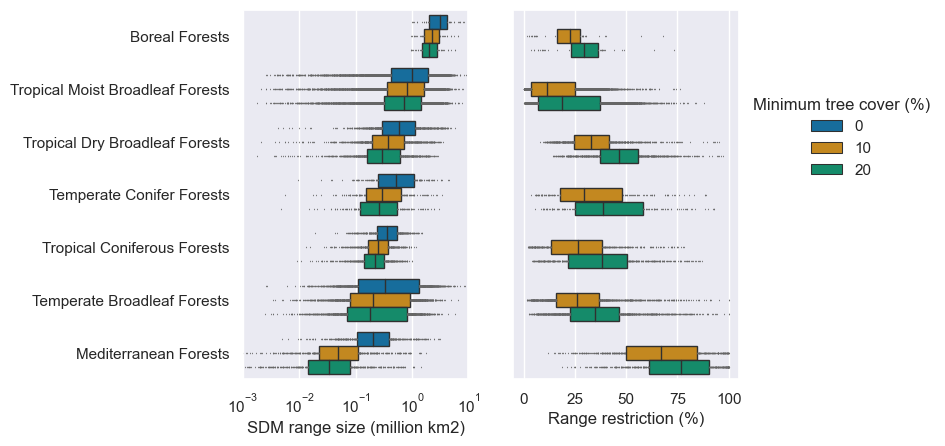

In [368]:
biome_order = df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 0].groupby('biome_name').area.median().sort_values(ascending=False).index.to_list()
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.boxplot(
    ax=ax1, data = df_range_size_restriction, x = 'area', y='biome_name', hue='min_tree_cover', whis=0, 
    order=biome_order, flierprops={'markerfacecolor':'0.4', 'markersize':1, 'markeredgecolor':'none'}, 
    boxprops={'linewidth':'1'}, medianprops={'linewidth':'1'}, capprops ={'linewidth':'0'}, palette='colorblind'
)
ax1.legend([], [], frameon=False)
ax1.set(xlabel='SDM range size (million km2)', ylabel=None)
# ax1.set_xlim(0,5)
ax1.set_xscale('log')
ax1.set_xlim(1e-3,1e1)
ax1.set_xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1])

sns.boxplot(
    ax=ax2, data = df_range_size_restriction, x='range_restriction', y='biome_name', hue='min_tree_cover', whis=0,
    order=biome_order, flierprops={'markerfacecolor':'0.4', 'markersize':1, 'markeredgecolor':'none'}, #whiskerprops={'linestyle':'--', 'linewidth':1},
    boxprops={'linewidth':'1'}, medianprops={'linewidth':'1'}, capprops ={'linewidth':'0'}, palette='colorblind'
)
ax2.set(yticklabels = [], ylabel=None, yticks=[], xlabel='Range restriction (%)')
ax2.legend(bbox_to_anchor=(1,0.8), loc='upper left', title='Minimum tree cover (%)', frameon=False)
ax2.set_xticks([0,25,50,75,100])



In [205]:
df_range_size_restriction['area_norm'] = df_range_size_restriction['area'] /df_range_size_restriction['area'].abs().max() #+ 1e-3
df_range_size_restriction['range_restriction_norm'] = df_range_size_restriction['range_restriction'] /df_range_size_restriction['range_restriction'].abs().max() #+ 1e-3

AxesSubplot(0.125,0.53;0.168478x0.35) Mediterranean Forests
AxesSubplot(0.327174,0.53;0.168478x0.35) Tropical Coniferous Forests
AxesSubplot(0.529348,0.53;0.168478x0.35) Temperate Conifer Forests
AxesSubplot(0.731522,0.53;0.168478x0.35) Temperate Broadleaf Forests
AxesSubplot(0.125,0.11;0.168478x0.35) Tropical Dry Broadleaf Forests
AxesSubplot(0.327174,0.11;0.168478x0.35) Tropical Moist Broadleaf Forests
AxesSubplot(0.529348,0.11;0.168478x0.35) Boreal Forests


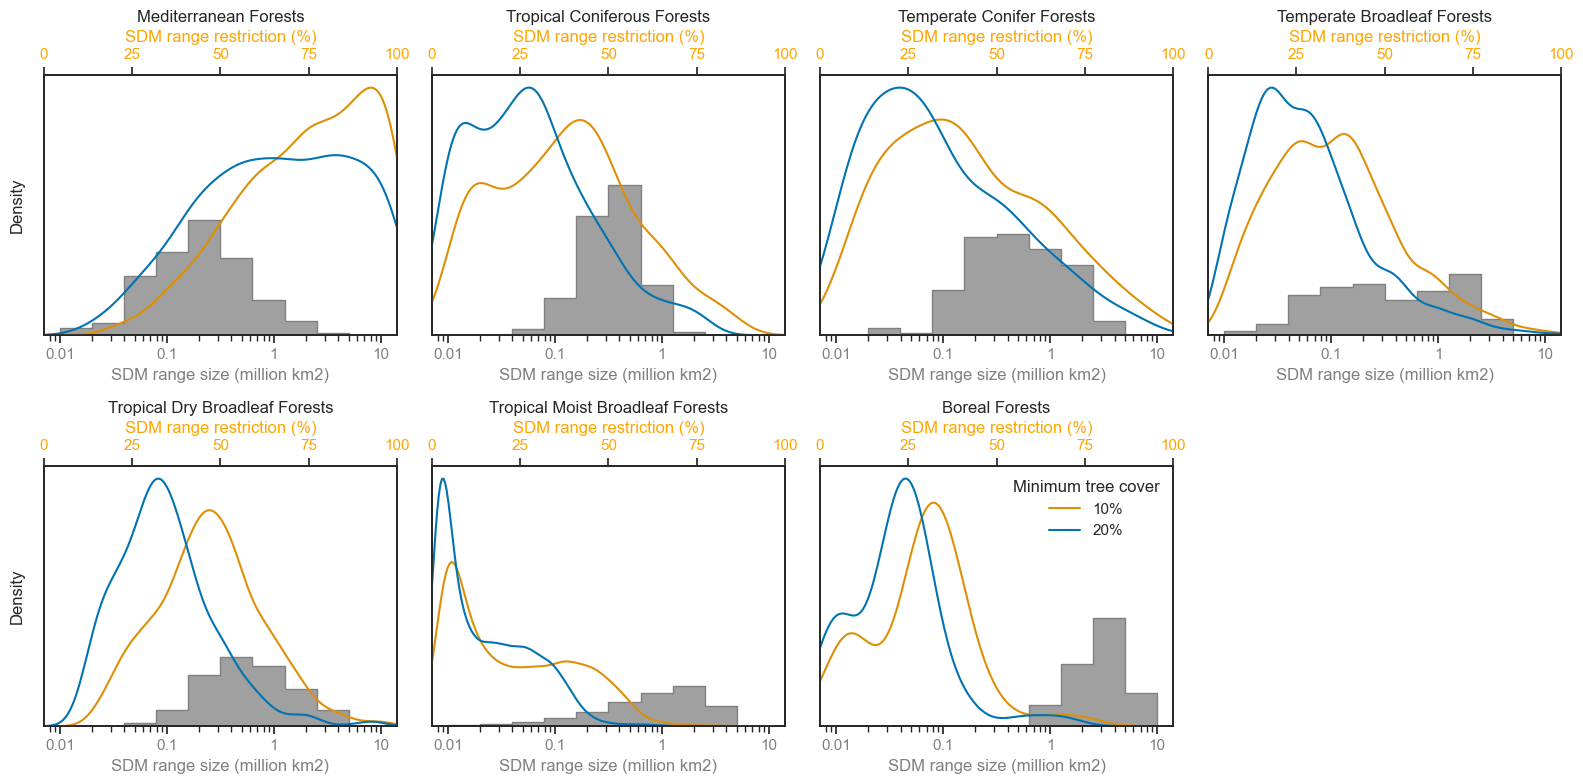

In [274]:
sns.set_style("white")
fig, axs = plt.subplots(2, 4, figsize=(16,8))

biomes = df_range_size_restriction.groupby('biome_name').area.mean().sort_values().index

for ax, biome in zip(axs.flat[0:7], biomes):
    print(ax, biome)
    df_b = df_range_size_restriction[df_range_size_restriction.biome_name == biome]
    sns.histplot(ax=ax, data=df_b[df_b.min_tree_cover == 0], x='area_norm', stat='density', element="step", log_scale=True, color='grey', bins=10, binrange=(-3, 0))
    ax.set_xticks([1e-3, 1e-2, 1e-1, 1e0])
    ax.set_xticklabels([0.01, 0.1, 1, 10], color='grey')
    
    ax2 = ax.twiny()
    sns.kdeplot(ax=ax2, data=df_b[df_b.min_tree_cover != 0], x='range_restriction_norm', hue='min_tree_cover', common_norm=False, palette='colorblind', legend=False) 
    ax2.set_xlim(0,1)
    ax2.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax2.set_xticklabels([0, 25, 50, 75, 100], color='orange')
    #if biome != 'Boreal Forests': ax2.get_legend().remove()
    if biome == 'Boreal Forests': ax2.legend(title='Minimum tree cover', labels=['10%','20%'], frameon=False)
    #sns.move_legend(ax2, "upper right", frameon=False)
    
    if biome not in ['Mediterranean Forests', 'Tropical Dry Broadleaf Forests']: ax.set_ylabel(None)
    ax.set_title(biome)
    ax.set_xlabel('SDM range size (million km2)', color='grey')
    ax2.set_xlabel('SDM range restriction (%)', color='orange')
    ax.set_yticklabels([])

ax8 = axs.flat[7]
fig.delaxes(ax8) 

plt.tight_layout()
plt.show()

In [7]:
df_melt = df_range_size_restriction.melt(id_vars=['species', 'min_tree_cover', 'biome_name'])
df_melt

,species,min_tree_cover,biome_name,variable,value
0,Abarema_barbouriana,0,Tropical Moist Broadleaf Forests,area,0.941661
1,Abarema_barbouriana,10,Tropical Moist Broadleaf Forests,area,0.919650
2,Abarema_barbouriana,20,Tropical Moist Broadleaf Forests,area,0.904127
3,Abarema_brachystachya,0,Tropical Moist Broadleaf Forests,area,0.804058
4,Abarema_brachystachya,10,Tropical Moist Broadleaf Forests,area,0.583012
...,...,...,...,...,...
73675,Zygia_unifoliolata,10,Tropical Moist Broadleaf Forests,range_restriction,10.633767
73676,Zygia_unifoliolata,20,Tropical Moist Broadleaf Forests,range_restriction,14.660115
73677,Zygogynum_pancheri,0,Tropical Moist Broadleaf Forests,range_restriction,NaN
73678,Zygogynum_pancheri,10,Tropical Moist Broadleaf Forests,range_restriction,2.110478


(0.0, 100.0)

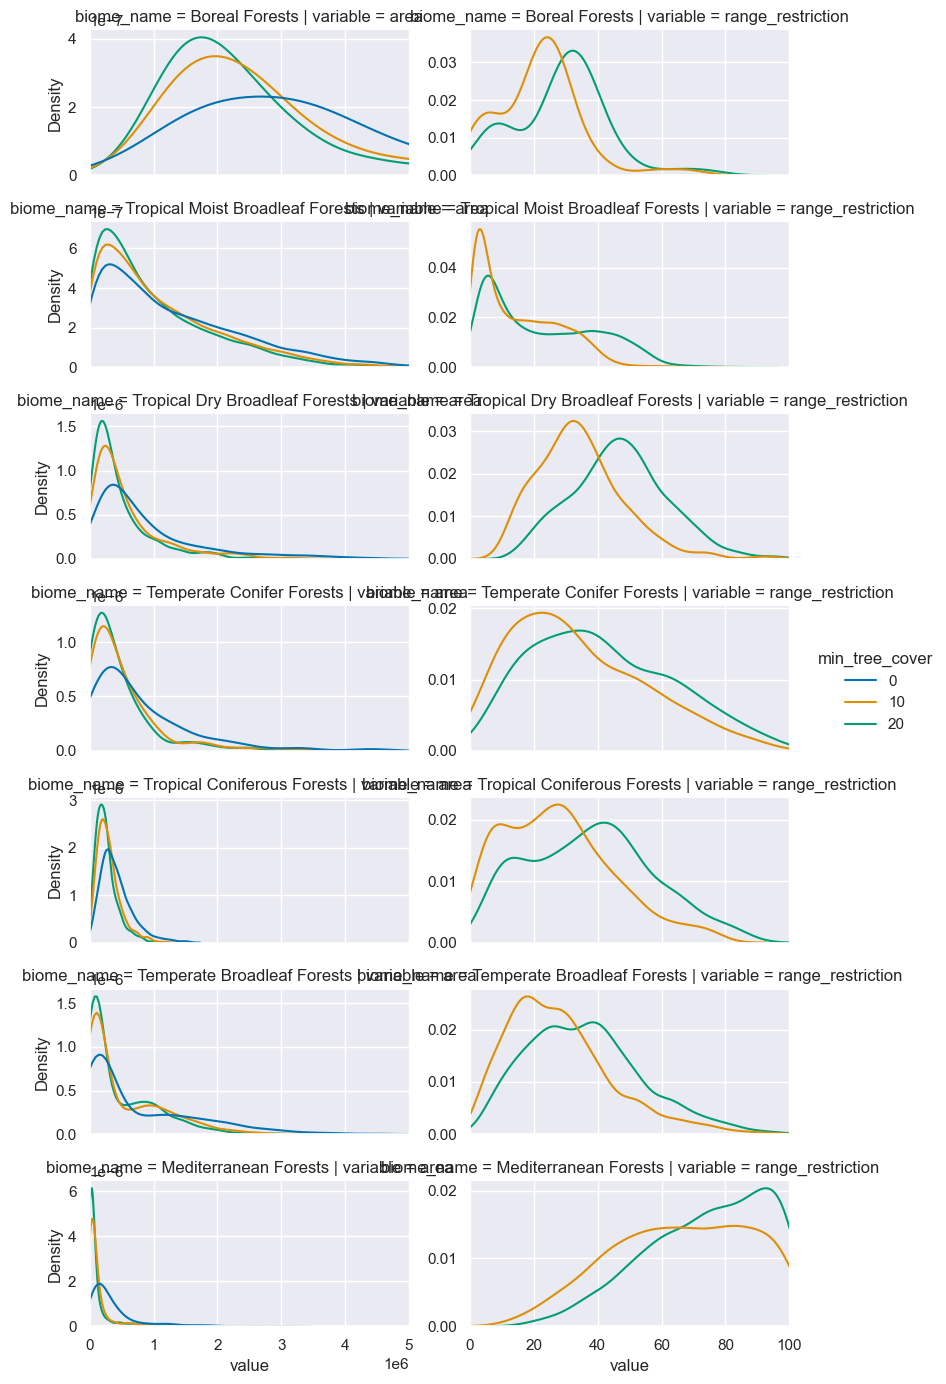

In [321]:
g = sns.displot(
    data = df_melt, x = 'value', hue='min_tree_cover', kind='kde', col='variable', row='biome_name', row_order=biome_order, common_norm = False,
    facet_kws=dict(sharex='col', sharey=False), palette='colorblind', height=2, aspect=2
)
g.axes[0,0].set_xlim(0, 5e6)
g.axes[0,1].set_xlim(0, 100)